# Project: Cardio Good Fitness Case Study
Problem Statement Description
## Objective
Explore the dataset to identify differences between the customers of each product and explore relationships between the different attributes of the customers.

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

1. Product - The model no. of the treadmill
2. Age - Age of the customer in no of years
3. Gender - Gender of the customer
4. Education - Education of the customer in no. of years
5. Marital Status - Marital status of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Income of the customer
9. Miles- Miles that a customer expects to run

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('D:/CDAC/Advance analytics and stat/ML/CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [8]:
data.shape

(180, 9)

In [12]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [14]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Univariate Analysis

### (1) Age

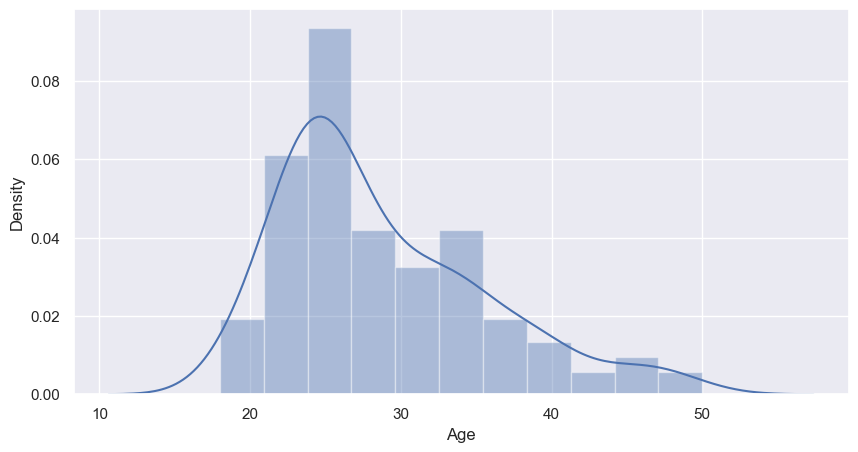

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(data['Age']);

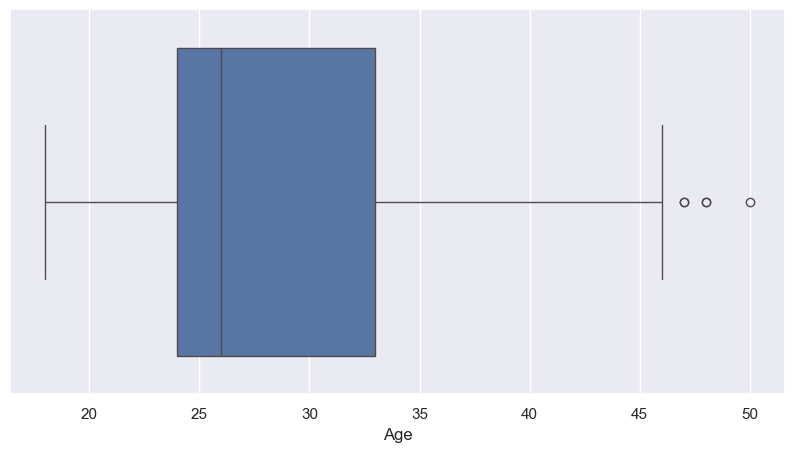

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Age']);

### Obervations
1. The Average age of customers is between 28-29 years old.
2. The youngest customer is 18 years old and the oldest is 50 years old
3. About 75% of the customers are aged below 33 years old >> hence age variable is right skewed (proved by distribution diagram and bloxplot above)
4. The box plot shows some outliers for ages above 46 years old

### (2) Education

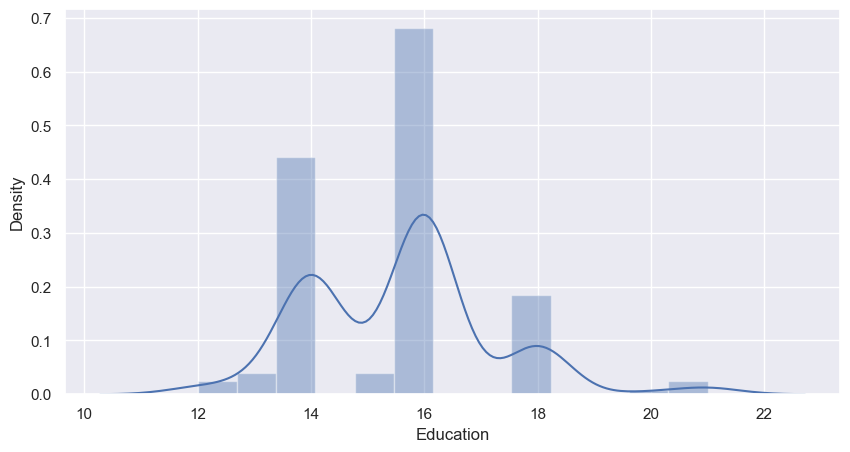

In [39]:
plt.figure(figsize = (10,5))
sns.distplot(data['Education']);

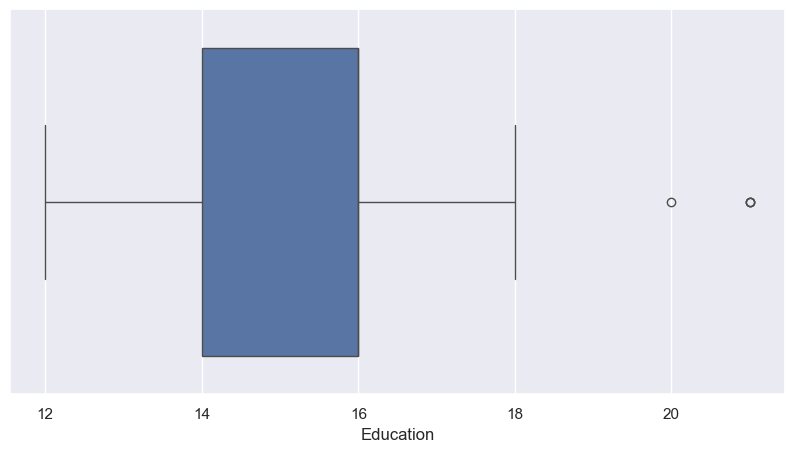

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Education']);

### Observation:
1. The Average education years of customers is between 15-16 years
2. The least educated customer studied for 12 years and the most educated studied for 21 years
3. Boxplot shows someo outliers of education years greater than 18 years

### (3) Income

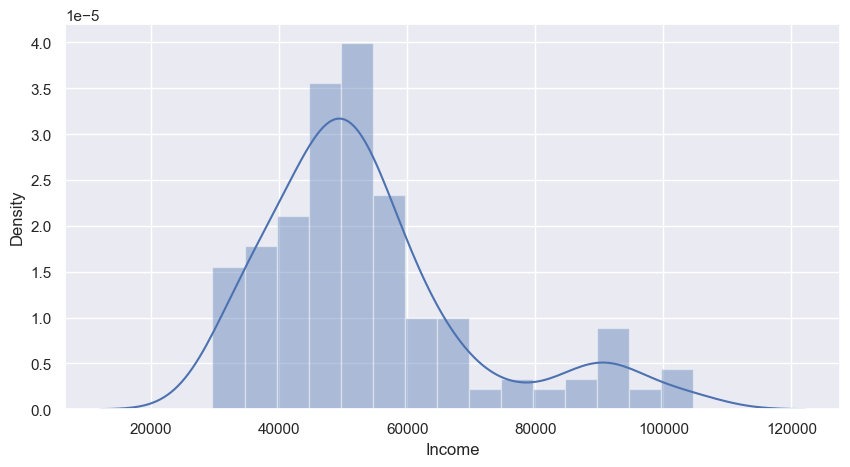

In [52]:
plt.figure(figsize = (10,5))
sns.distplot(data['Income']);

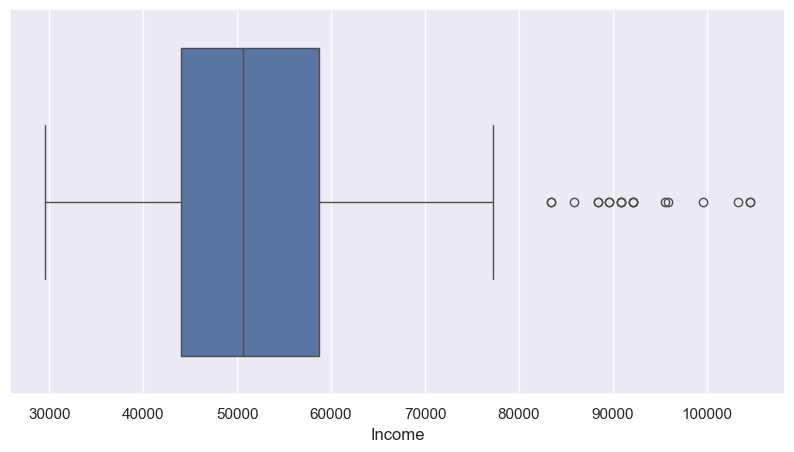

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Income']);

### Obserations:

* On Average annual income of custoemrs is between 53K - 54K
* The least annual income is 29K and the max is 104K
* About 75% of the customers earn annual income of 58K or less >> hence Income variable seem to right skewed (checked via distplot & boxplot)
* Boxplot shows outliers for income level approx 77K and abov

### (4) Usage

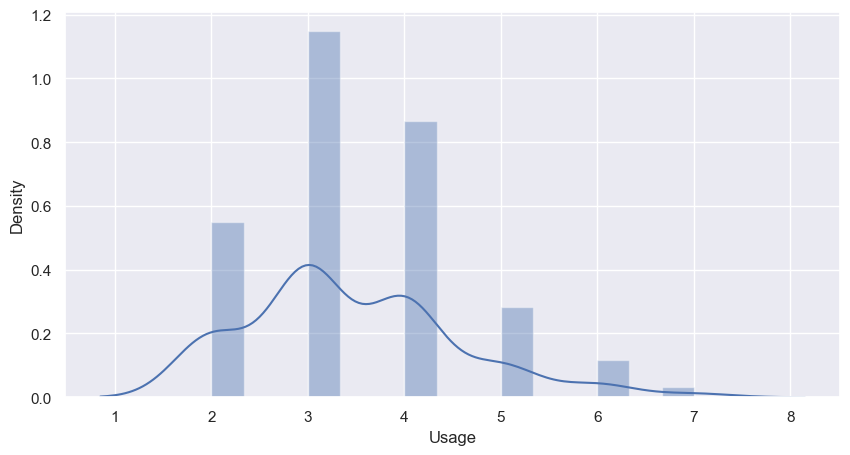

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(data['Usage']);

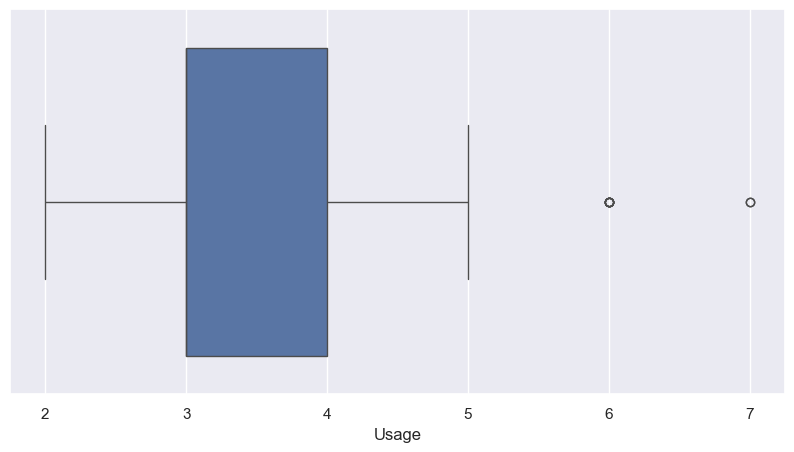

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Usage']);

### Observations:

* On Average customers use the trademills 3-4 time per week
* The least usage is 2 time per week and the max usage is 7 timer per week
* The mean usage is very close to the median hence data seems to be normally distributed (checked via distplot and boxplot)
* The box plot shows some outliers for usage of 5 days and above

### (5) Fitness

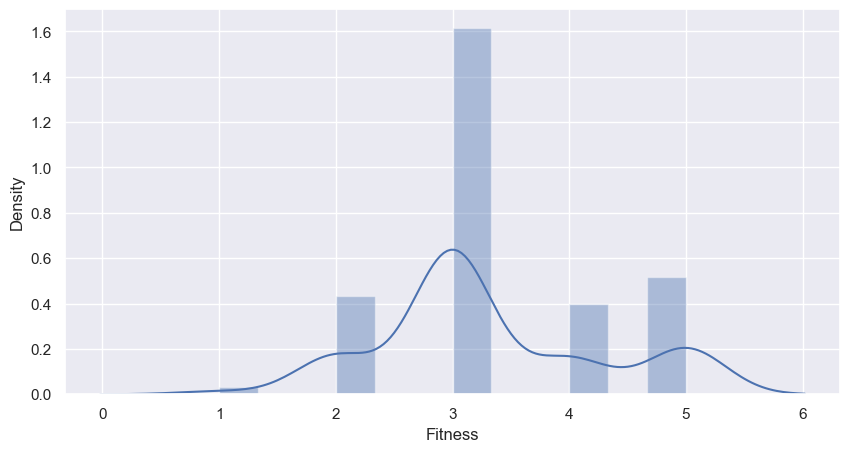

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(data['Fitness']);

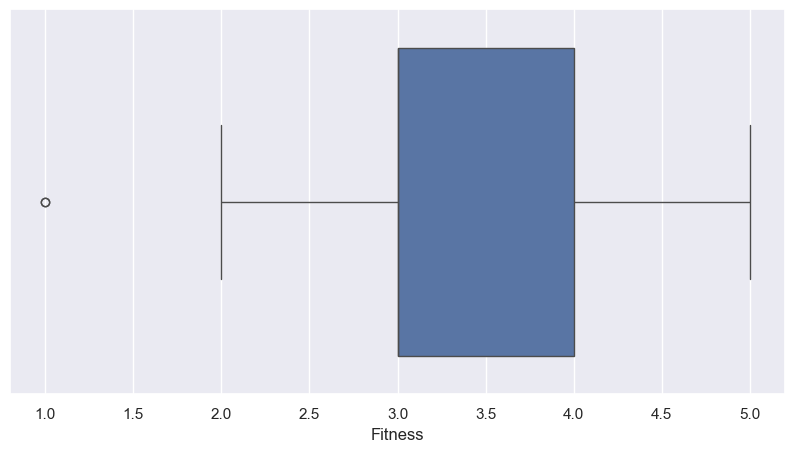

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Fitness']);

### Observation

* On Average fitness level of custoemrs is between 3 - 4
* The least fitness level is 1 and the max is 5
* Boxplot shows outliers of fitness level below 2

### (6) Miles

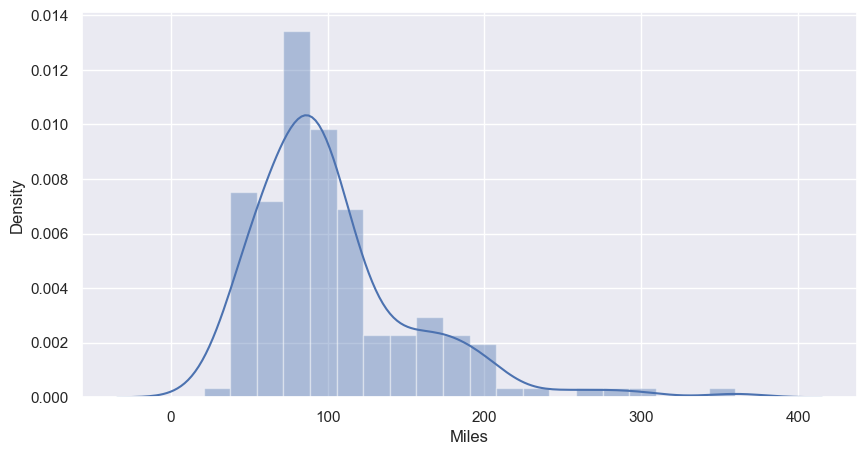

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(data['Miles']);

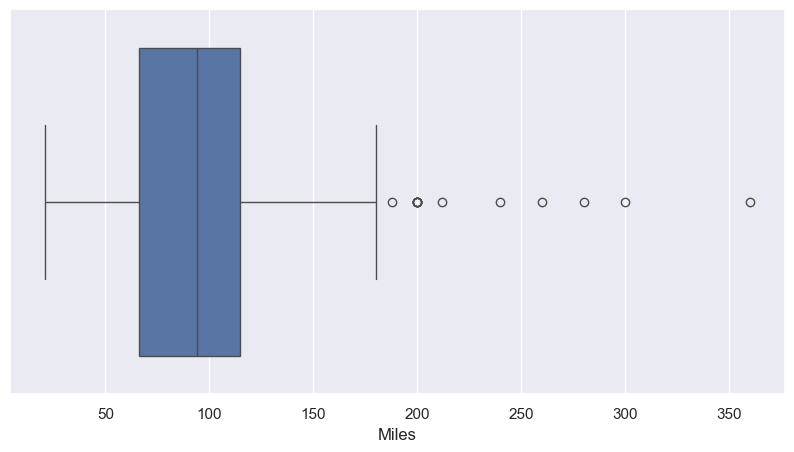

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x= data['Miles']);

### Observations:

* On Average running miles expected by custoemrs is approx 103 miles
* The least expected miles is 21 and the max is 360
* About 75% of the customers expect to run 114 miles or less >> hence the miles variable seem to right skewed (checking via distplot & boxplot)
* Boxplot shows outliers who expect to run 180 miles or above

## Multivariate Analysis

#####  Derive the scatter plots between all variables via pairplot function

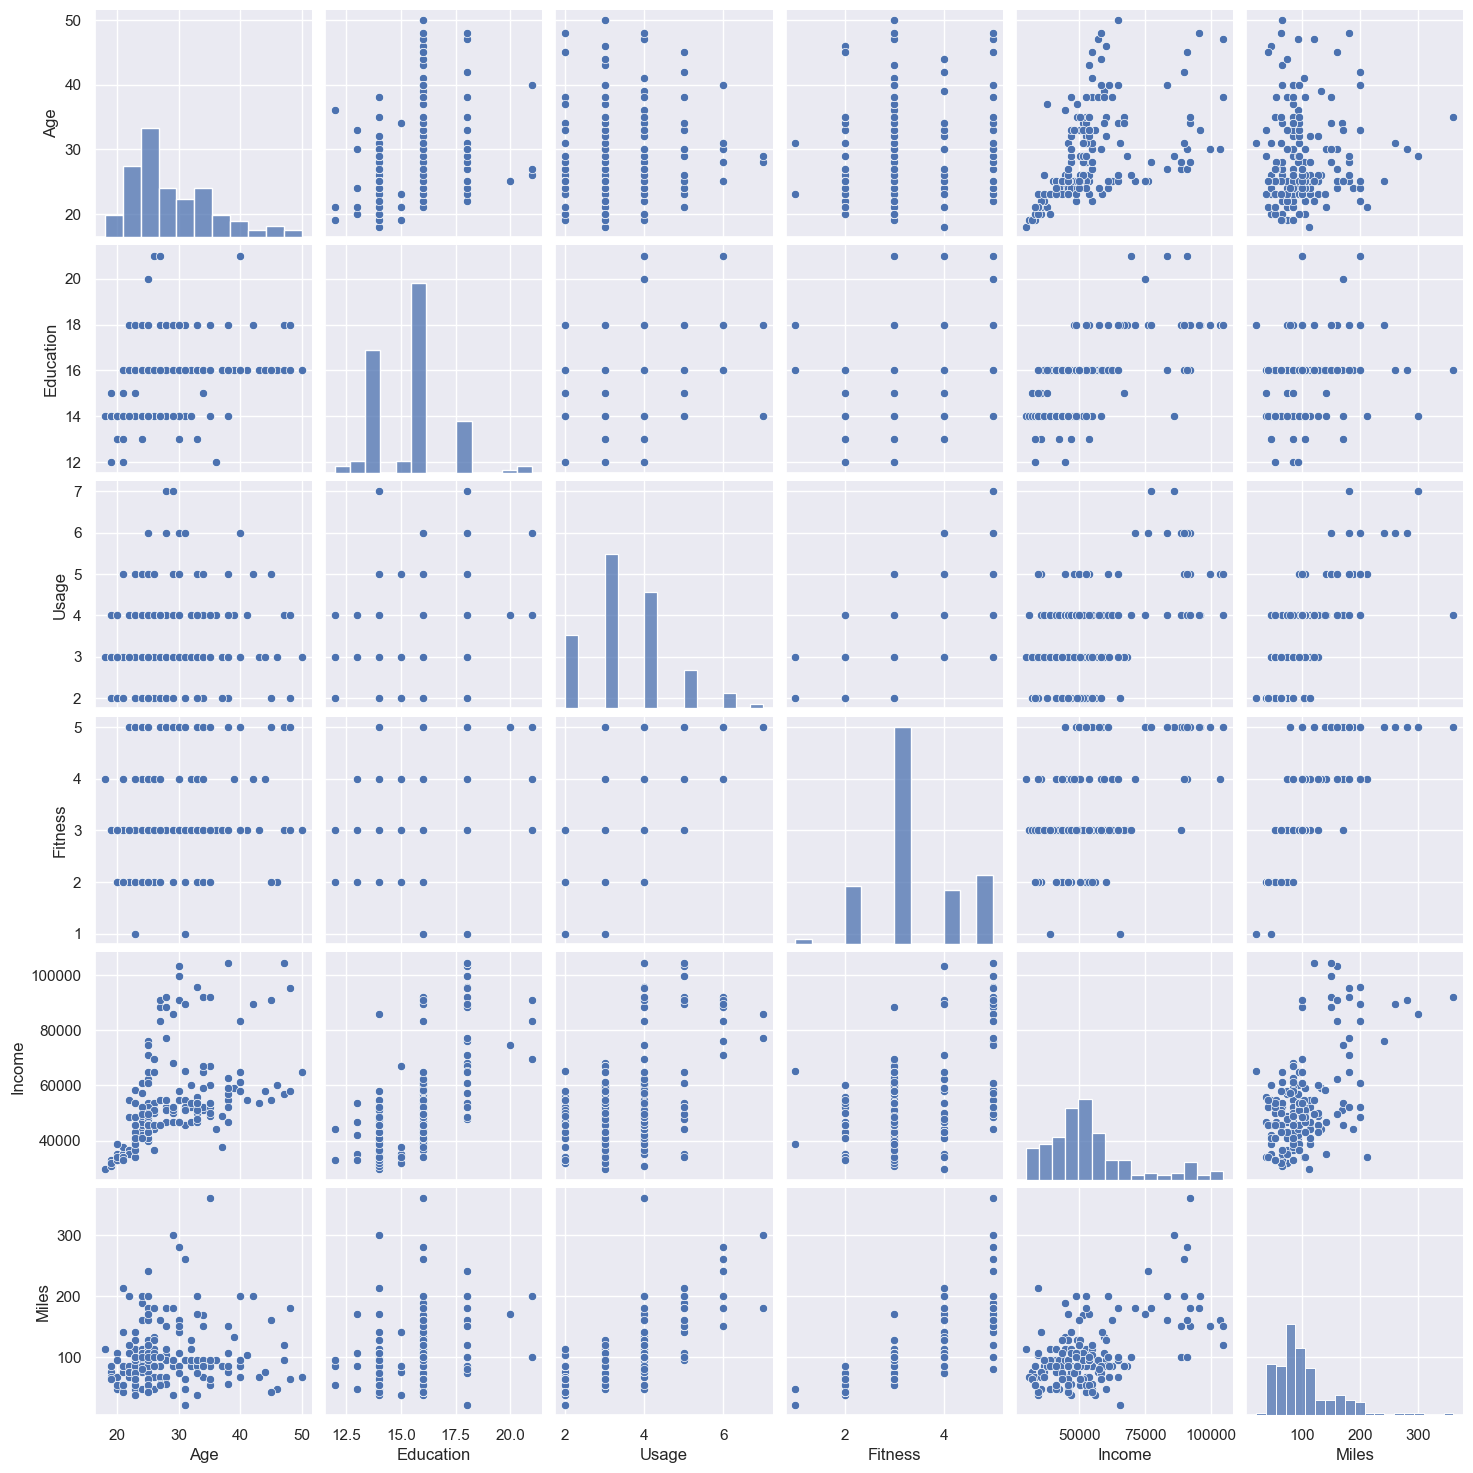

In [165]:
sns.pairplot(data) ;

###  Exploring the product line & Customer profiles

In [80]:
data['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

In [82]:
(data['Product'].value_counts()/len(data['Product']))*100

Product
TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: count, dtype: float64

### Observation: Three product types:

1. TM195 is the most popular making 44.4% of the sales
2. TM498 is in between making 33.3% of the sales
3. TM798 is the least popular making 22.2% of the sales

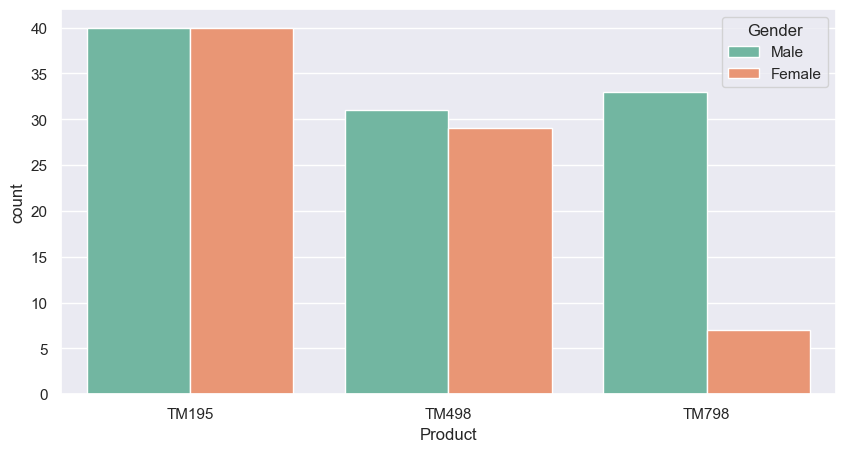

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Product', hue='Gender', palette='Set2');

### Observation:

1. TM195 share common interest between Males & Females
2. TM498 intrest in Females is slightly less than Males
3. TM798 is the Most popular between Males than female

## Diving deeper into the customer characteristic with respect to product:
### (1)- Bin customers into 4 age groups :
1. 15-20 = Teens
2. 20-30=20s
3. 30-40=30s
4. 40-50=40s

In [86]:
data['Age Group'] = pd.cut(data['Age'],bins=[15,20,30,40,50],labels=['teen','20s','30s','40s'])
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group
0,TM195,18,Male,14,Single,3,4,29562,112,teen
1,TM195,19,Male,15,Single,2,3,31836,75,teen
2,TM195,19,Female,14,Partnered,4,3,30699,66,teen
3,TM195,19,Male,12,Single,3,3,32973,85,teen
4,TM195,20,Male,13,Partnered,4,2,35247,47,teen


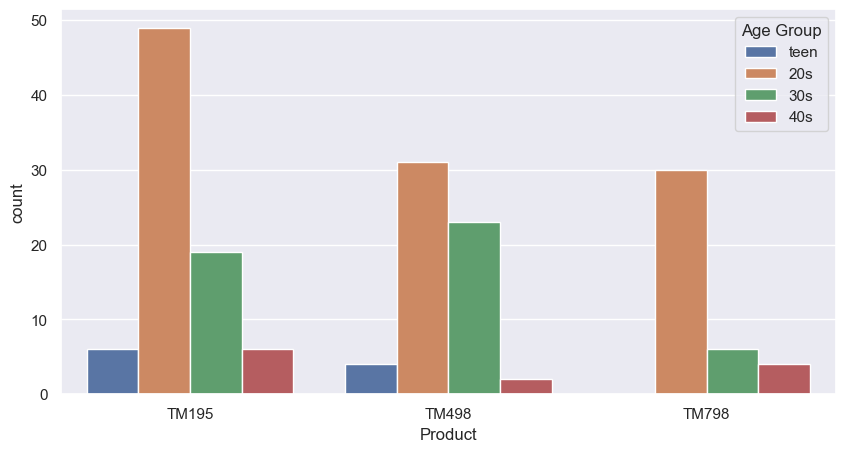

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Product', hue='Age Group');

### Observation:

* The most common age group purchasing all products is the 20s- adults aged between 20 & 30 years old
* TM195 is the most common between 20s followed by 30s(after a big gap) then 30s and 40s share almost the same intrest in that product
* TM498 is the most common between 20s followed by 30s(after a moderate gap) then 30s and then 40s
* TM798 is the most common between 20s followed by 30s(after a big gap) then 40s. Teens do not share any intrest

### 2- Now plot the distribution of product with respect to fitness level

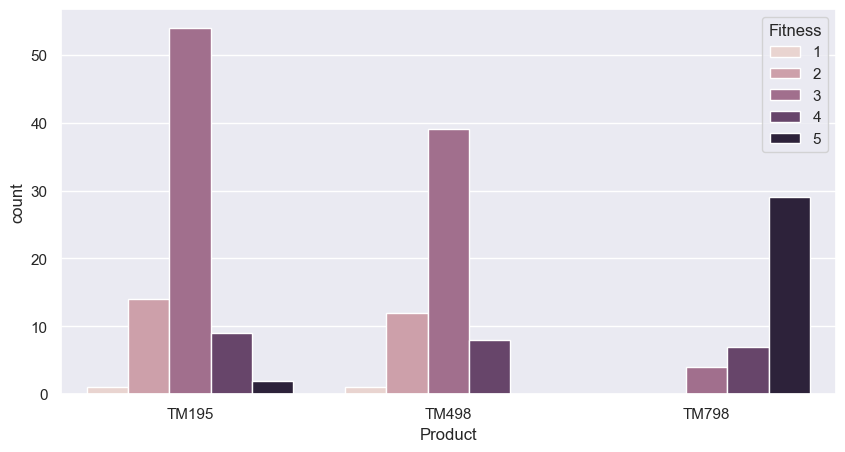

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Product', hue='Fitness');

## Observation:

* TM195 is the most common for fitness level 3
* TM498 is the most common for fitness level 3
* TM798 is the most common for fitness level 5

## 3- Observing if the expected Miles to run by customers affect the choice of product
To observe this:
### We will bin the miles into 3 different "Stamina levels" based on the IQR data derived earlier from data.describe() :
* 21-66 Miles: Beginners
* 66 - 114 Miles: Intermediates
* 114 - 180 Miles: Advanced

In [92]:
data['Stamina']= pd.cut(data['Miles'], bins=(21,66,114,180),labels=['Beginners','Intermediate','Advanced'])
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group,Stamina
0,TM195,18,Male,14,Single,3,4,29562,112,teen,Intermediate
1,TM195,19,Male,15,Single,2,3,31836,75,teen,Intermediate
2,TM195,19,Female,14,Partnered,4,3,30699,66,teen,Beginners
3,TM195,19,Male,12,Single,3,3,32973,85,teen,Intermediate
4,TM195,20,Male,13,Partnered,4,2,35247,47,teen,Beginners


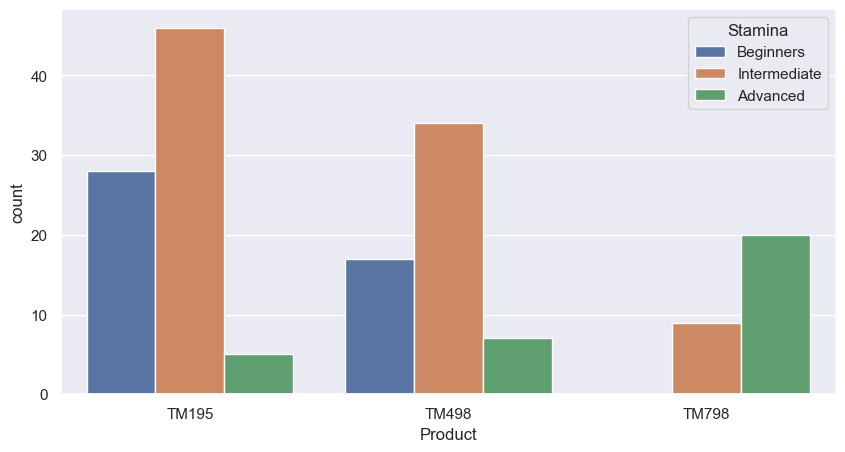

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Product', hue='Stamina');

## Observation:

* TM195 is best suited for Beginners and Intermediate runners (who are expected to run 114 miles or less)
* TM498 is best suited for Intermediate runners (who are expected to run between 66 & 114 miles)
* TM798 is best suited for Advanced runners awho are expected to run above 114 miles

### 4- Exploring if the customers marital status affect the choice of product

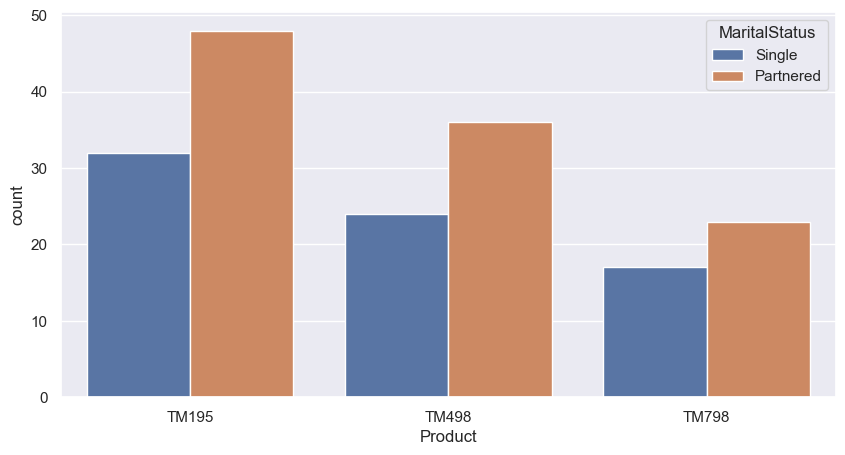

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Product', hue='MaritalStatus');

## Observation:

* TM195 & TM498 & TM798 are purchased more by partnered customers

## 5- Exploring if the income level effect on product choice:
### Bin data set into 4 different income levels (Derived from the box plot below):
* 20K to 40K : Low Income
* 40K to 50K : Medium Income
* 50K to 60K : High Income
* 60K to 105K : Very High Income

In [98]:
# Binning the data set into income levels
data['Income Level']= pd.cut(data['Income'], bins=(20000,40000,50000,60000,105000),labels=['Low In','Med In','High In','V.High In'])
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group,Stamina,Income Level
0,TM195,18,Male,14,Single,3,4,29562,112,teen,Intermediate,Low In
1,TM195,19,Male,15,Single,2,3,31836,75,teen,Intermediate,Low In
2,TM195,19,Female,14,Partnered,4,3,30699,66,teen,Beginners,Low In
3,TM195,19,Male,12,Single,3,3,32973,85,teen,Intermediate,Low In
4,TM195,20,Male,13,Partnered,4,2,35247,47,teen,Beginners,Low In


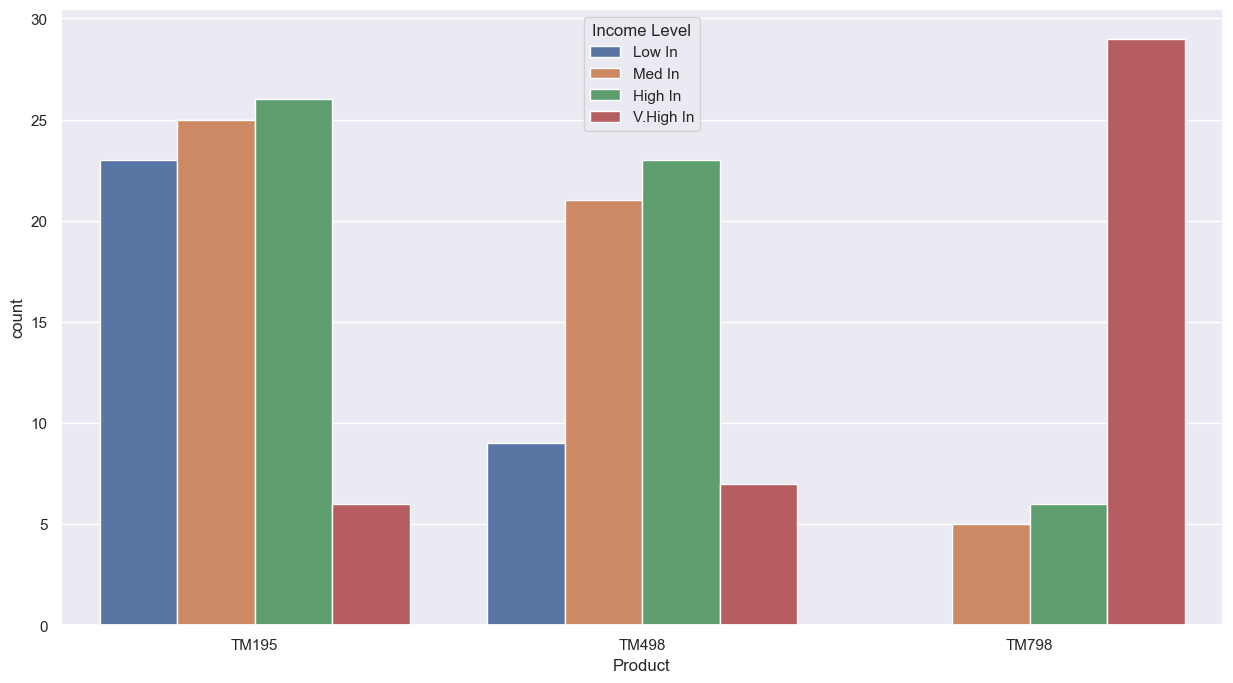

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='Product', hue='Income Level');

### Observation:

* TM195 : Seems to be an affordable option hence it is preferred for Low-Med-High income levels (yet not preferred by V.High Income level)
* TM498 : Most preferred for medium and high income levels
* TM798 : Highly preffereed by V.High income levels and not at all by low income level customers

### 6 Exploring if the education level effect on product choice:
#### Bin data set into 4 different education levels (Derived from the basic statistics info table above):
* 12 to 14 years: Basic Education
* 14 to 16 years: Medium Education
* 16 to 18 years: High Education
* 18 to 21 years: Very High Education

In [108]:
# Binning the data set into education levels
data['Education Level']= pd.cut(data['Education'], bins=(11,14,16,18,21),labels=['Basic Edu','Med Edu','High Ed','V.High Ed'])

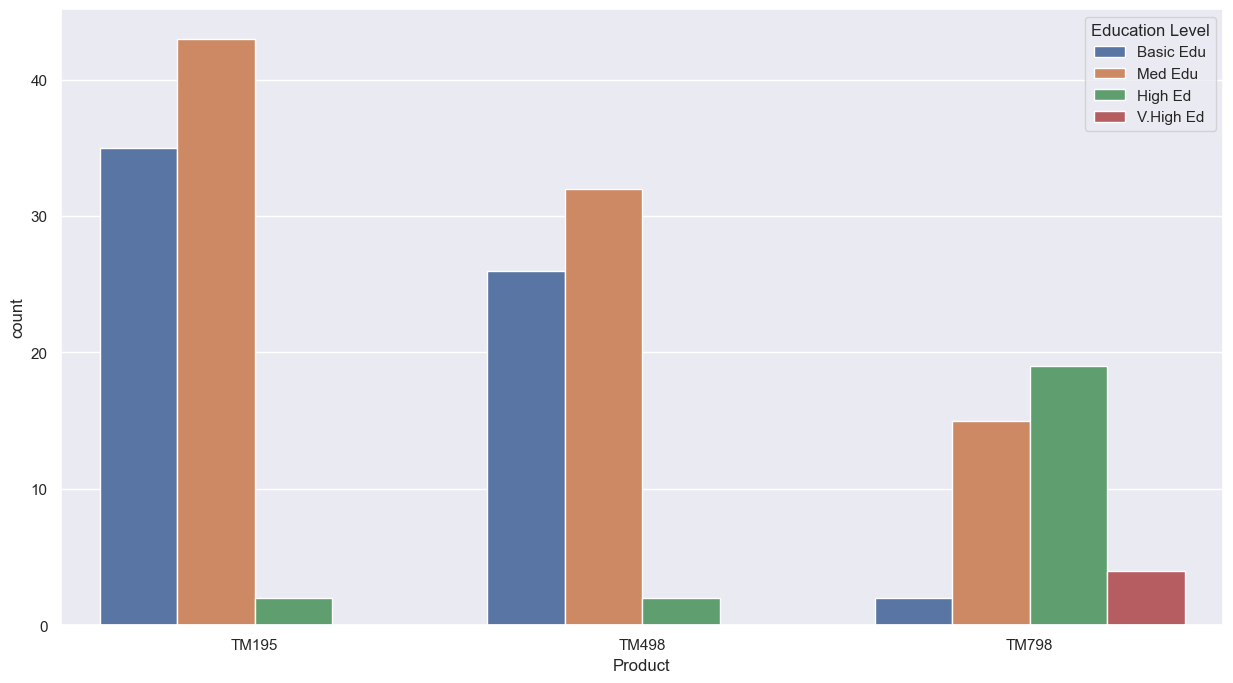

In [112]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='Product', hue='Education Level');

### Observation:

* TM195 & TM498 : Preferred most by Basic and Medium educated
* TM798 is the only product bought by the V.High Educated and highly preferrable by the High education compared to TM195 & TM498

### 7- Exploring if the customer expected usage effect on product choice:

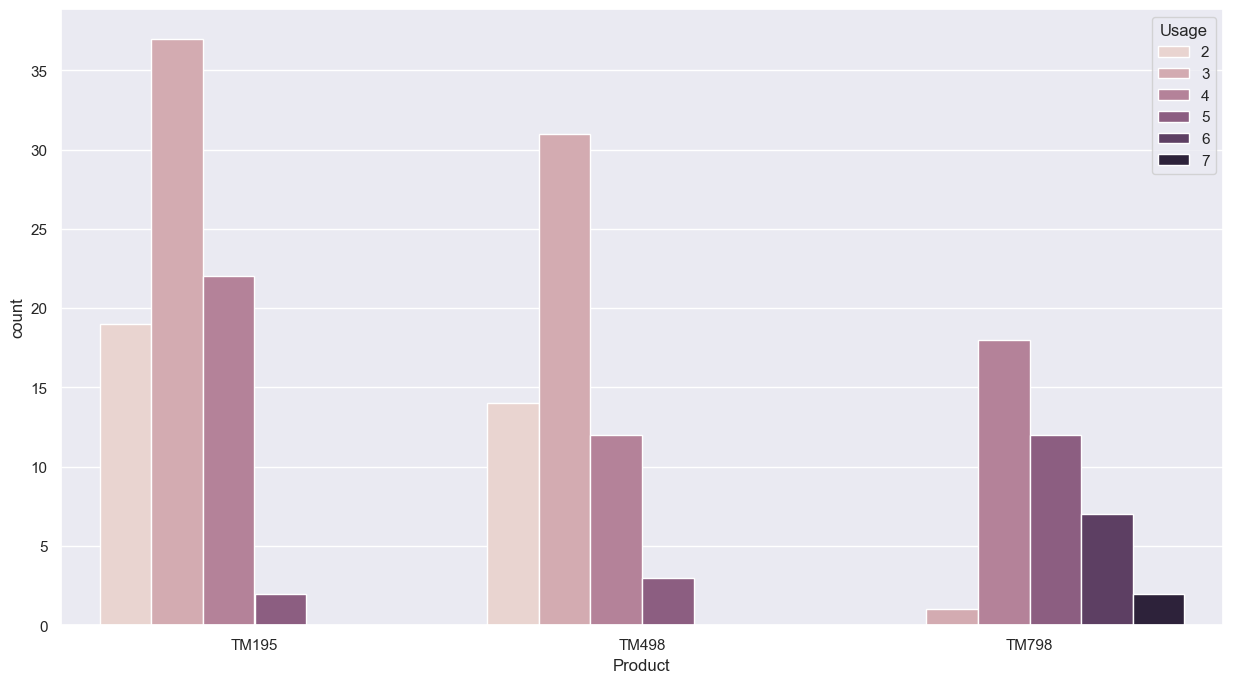

In [136]:
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='Product', hue = 'Usage');

### Observation:

* TM195 & TM498 : Mostly expected to be used 3 times per week
* TM798 Mostly expected to be used 3 times per week and is the only product with customers expected to use up to 7 times a week

## Key Insights and Observations:
* The dominant age group for purchasing all product is the 20s
* The dominant fitness criteria for TM798 are the most fit customers who can run 114 mile and above
* Male & Females are equaly interested in TM195 & TM498 yet males are much more interested in TM798
* TM195 & TM498 & TM798 are purchased more by partnered customers
* TM195 Is the most affordable choice
* TM798 Is the most expensive choice preferred highly by the V.High Income, Education and fitness level customers

### Product's Popularity (in terms of sales)
* TM195 is the most popular with approx sales of 44% from total sales
* TM498 is the next popular with approx sales of 33% from total sales
* TM798 is the least popular with approx sales of 22% from total sales

## Insights
* TM195 is the most suitable choice for the majority of fitness,education and income levels, hence most popular
* TM798 is the most suitable choice for elite athelits hence it is expected to have a higher level of technology and quality hence it seems to be set at a higher price level which tightens its target customers to V.High income levels.
* TM498 stands in a middle ground between TM195 and TM798

## Recommendations:
* TM195 requires a generalized marketing campaign and requires to be available in stock to sustain the demand
* TM498 and TM195 customer profiles are very close hence it requires more marketing to the beginner and advanced fitness level customers
* TM798 shares the intermediate fitness level interest with TM195 and TM498 hence can grow its customer base by reducing the price point to fit the income level customers noting that quality has to be maintained